In [2]:

import numpy as np
from scipy.integrate import quad

def r_wave(n,b,amp, p1,p2):
    period = abs(p1)+abs(p2)
    c = -1
    def a0(x):
        return (c*b*amp*(x))/(period) + amp
        
    R_a0, _ = quad(a0, 0, p2)
    c = 1
    R1_a0, _ = quad(a0,p1,0)
    R_a0 = 1/500*(R_a0+R1_a0)
    
    
    
    def aN(low, high):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (a0(x))*np.cos((i*np.pi*x)/500)
            arr[i-1], _ = quad(f, low, high)
        return arr
    
    R_an = []
    R_an = aN(p1,0)
    c = -1
    R1_an = []
    R1_an = aN(0, p2)
    a_N = 1/500*(R_an+R1_an)
    return a_N, R_a0

def s_wave(n, b, amp, period, p1, p2, c2):
    
    f1 = lambda x : ((-1*b*amp*(x))/(period) + amp)
    f2 = lambda x : ((b*amp*(x+c2))/(period) + amp)
      
    R_a0, _ = quad(f1 ,20, 30)#p1, (p2/2)+(p1/2))
    R1_a0, _ = quad(f2 , 30, 40)#(p2/2)+(p1/2),p2)
    R_a0 = (1/500)*(R_a0+R1_a0)
    
    
    
    def aN(low, high, f):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f3 = lambda x : (f(x))*np.cos((i*np.pi*x)/500)
            arr[i-1], _ = quad(f3, low, high)
        return arr
    
    R1_an = aN(20,30, f1)#p1, (p2/2)+(p1/2))
    R_an = aN(30,40, f2)#(p2/2)+(p1/2),p2)

    
    a_N = (1/500)*(R_an+R1_an)
    return a_N, R_a0
    


def T_wave(n, low, high, amp, c1):
    def a0(x):
        return -0.00009375 * ((x + c1)**2) + amp
    T_a0, _ = quad(a0, a=low, b=high)
    
    def aN():
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (-9.375e-5 * ((x + c1)**2) + amp)*(np.cos((i*np.pi*x)/(500)))
            arr[i-1], _ = quad(f, a=low, b=high)
        return arr
    
    def bN():
        arr = np.zeros(n)
        for i in range(1, n + 1):
            f = lambda x: (-(9.375e-5 * (x + c1)**2) + amp) * np.sin((i * np.pi * x) / 500)
            arr[i - 1], _ = quad(f, low, high)
        return arr
    T_a0 = T_a0 * (1/500)
    T_aN = aN()*(1/500)
    T_bN = bN()*(1/500)
    return T_aN, T_a0, T_bN


def fourier():
    #R-WAVE
    n, b, amp, p1, p2 = 60, 2, 3.5, -20, 20
    R_an, R_a0 = r_wave(n,b,amp, p1,p2)
    #Q_an, Q_a0 = coefficients(n, b, amp, 20, 40, -60)
    S_an, S_a0 = s_wave(n, b, amp, abs(p1)+abs(p2), 20, 40, -60)
    T_an, T_a0, T_bn = T_wave(n, 200, 360, .6,-280)
    P_an, P_a0, P_bn = T_wave(n, -260, -143, .3, 200)
    #R_an +=  Q_an + S_an  
    R_a0 +=  T_a0 + S_a0 + P_a0
    
    x = np.arange(-10000, 10000, 1)
    
    y = np.zeros(len(x))
    for j in range (len(x)):
        for i in range(1,n+1):
            y[j] +=  (np.cos((np.pi*i*x[j])/500) * T_an[i-1]) + (np.sin((np.pi*i*x[j])/500) * T_bn[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/500) * R_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/500) * S_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/500) * P_an[i-1]) + (np.sin((np.pi*i*x[j])/500) * P_bn[i-1])
        y[j] += (R_a0/2)
    return x, y

x, y = fourier()


(-1.0, 4.0)

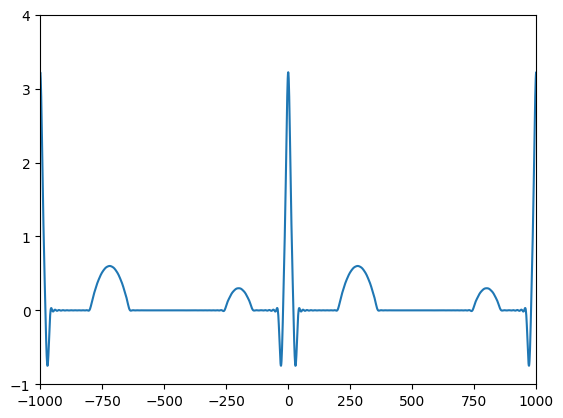

In [3]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlim(-1000, 1000)
plt.ylim(-1, 4)

In [4]:

import numpy as np
from scipy.integrate import quad
import random

def r_wave(n,b,amp, p1,p2):
    period = abs(p1)+abs(p2)
    c = -1
    def a0(x):
        return (c*b*amp*(x))/(period) + amp
        
    R_a0, _ = quad(a0, 0, p2)
    c = 1
    R1_a0, _ = quad(a0,p1,0)
    R_a0 = 1/800*(R_a0+R1_a0)
    
    
    
    def aN(low, high):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (a0(x))*np.cos((i*np.pi*x)/800)
            arr[i-1], _ = quad(f, low, high)
        return arr
    
    R_an = []
    R_an = aN(p1,0)
    c = -1
    R1_an = []
    R1_an = aN(0, p2)
    a_N = 1/800*(R_an+R1_an)
    return a_N, R_a0

def s_wave(n, b, amp, period, p1, p2, c2):
    
    f1 = lambda x : ((-1*b*amp*(x))/(period) + amp)
    f2 = lambda x : ((b*amp*(x+c2))/(period) + amp)
      
    R_a0, _ = quad(f1 ,20, 30)#p1, (p2/2)+(p1/2))
    R1_a0, _ = quad(f2 , 30, 40)#(p2/2)+(p1/2),p2)
    R_a0 = (1/800)*(R_a0+R1_a0)
    
    
    
    def aN(low, high, f):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f3 = lambda x : (f(x))*np.cos((i*np.pi*x)/800)
            arr[i-1], _ = quad(f3, low, high)
        return arr
    
    R1_an = aN(20,30, f1)#p1, (p2/2)+(p1/2))
    R_an = aN(30,40, f2)#(p2/2)+(p1/2),p2)

    
    a_N = (1/800)*(R_an+R1_an)
    return a_N, R_a0
    


def T_wave(n, low, high, amp, c1):
    def a0(x):
        return -0.00009375 * ((x + c1)**2) + amp
    T_a0, _ = quad(a0, a=low, b=high)
    
    def aN():
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (-9.375e-5 * ((x + c1)**2) + amp)*(np.cos((i*np.pi*x)/(800)))
            arr[i-1], _ = quad(f, a=low, b=high)
        return arr
    
    def bN():
        arr = np.zeros(n)
        for i in range(1, n + 1):
            f = lambda x: (-(9.375e-5 * (x + c1)**2) + amp) * np.sin((i * np.pi * x) / 800)
            arr[i - 1], _ = quad(f, low, high)
        return arr
    T_a0 = T_a0 * (1/800)
    T_aN = aN()*(1/800)
    T_bN = bN()*(1/800)
    return T_aN, T_a0, T_bN


def fourier():
    #R-WAVE
    n, b, amp, p1, p2 = 40, 2, 2.5, -20, 20
    R_an, R_a0 = r_wave(n,b,amp, p1,p2)
    #Q_an, Q_a0 = coefficients(n, b, amp, 20, 40, -60)
    S_an, S_a0 = s_wave(n, b, amp, abs(p1)+abs(p2), 20, 40, -60)
    T_an, T_a0, T_bn = T_wave(n, 200, 360, .6,-280)
    P_an, P_a0, P_bn = T_wave(n, -260, -143, .3, 200)
    #R_an +=  Q_an + S_an  
    R_a0 +=  T_a0 + S_a0 + P_a0
    
    x = np.arange(-10000, 10000, 1)
    ran = random.uniform(1, 1.2)
    p = 500
    prev = 0
    y = np.zeros(len(x))
    for j in range (len(x)):
        if x[j] % (p+prev) == 0:
            prev += p
            p = random.randint(400,600)
        for i in range(1,n+1):
            y[j] +=  (np.cos((np.pi*i*x[j])/p) * T_an[i-1]) + (np.sin((np.pi*i*x[j])/p) * T_bn[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/p) * R_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/p) * S_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/p) * P_an[i-1]) + (np.sin((np.pi*i*x[j])/p) * P_bn[i-1])
        y[j] += (R_a0/2)
    return x, y

x, y = fourier()


(-1.0, 4.0)

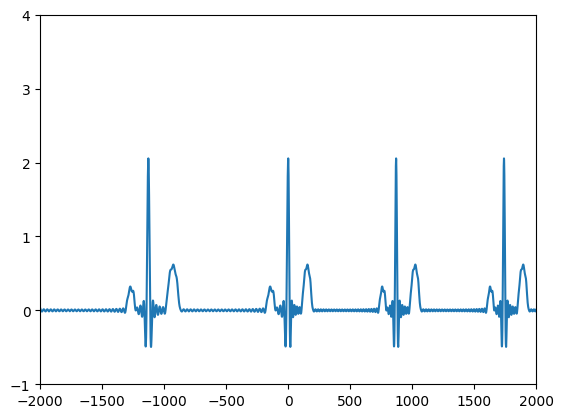

In [5]:
plt.plot(x, y)
plt.xlim(-2000, 2000)
plt.ylim(-1, 4)

In [6]:
import numpy as np

def p_wav(x, a_pwav, d_pwav, t_pwav, li):
    l = li
    a = a_pwav
    x = x + t_pwav
    b = (2 * l) / d_pwav
    n = 100
    p1 = 1 / l
    p2 = 0
    for i in range(1, n+1):
        harm1 = (((np.sin((np.pi / (2 * b)) * (b - (2 * i)))) / (b - (2 * i)) + 
                  (np.sin((np.pi / (2 * b)) * (b + (2 * i)))) / (b + (2 * i))) * 
                  (2 / np.pi)) * np.cos((i * np.pi * x) / l)
        p2 += harm1
    pwav1 = p1 + p2
    pwav = a * pwav1
    return pwav

def qrs_wav(x, a_qrswav, d_qrswav, li):
    l = li  #time period
    a = a_qrswav #amp
    b = (2 * l) / d_qrswav #distance
    n = 100
    qrs1 = (a / (2 * b)) * (2 - b)
    qrs2 = 0
    for i in range(1, n+1):
        harm = (((2 * b * a) / (i * i * np.pi * np.pi)) * 
                (1 - np.cos((i * np.pi) / b))) * np.cos((i * np.pi * x) / l)
        qrs2 += harm
    qrswav = qrs1 + qrs2
    return qrswav

def q_wav(x, a_qwav, d_qwav, t_qwav, li):
    l = li
    x = x + t_qwav
    a = a_qwav
    b = (2 * l) / d_qwav
    n = 100
    q1 = (a / (2 * b)) * (2 - b)
    q2 = 0
    for i in range(1, n+1):
        harm5 = (((2 * b * a) / (i * i * np.pi * np.pi)) * 
                 (1 - np.cos((i * np.pi) / b))) * np.cos((i * np.pi * x) / l)
        q2 += harm5
    qwav = -1 * (q1 + q2)
    return qwav

def s_wav(x, a_swav, d_swav, t_swav, li):
    l = li
    x = x - t_swav
    a = a_swav
    b = (2 * l) / d_swav
    n = 100
    s1 = (a / (2 * b)) * (2 - b)
    s2 = 0
    for i in range(1, n+1):
        harm3 = (((2 * b * a) / (i * i * np.pi * np.pi)) * 
                 (1 - np.cos((i * np.pi) / b))) * np.cos((i * np.pi * x) / l)
        s2 += harm3
    swav = -1 * (s1 + s2)
    return swav

def t_wav(x, a_twav, d_twav, t_twav, li):
    l = li
    a = a_twav
    x = x - t_twav - 0.045
    b = (2 * l) / d_twav
    n = 100
    t1 = 1 / l
    t2 = 0
    for i in range(1, n+1):
        harm2 = (((np.sin((np.pi / (2 * b)) * (b - (2 * i)))) / (b - (2 * i)) + 
                  (np.sin((np.pi / (2 * b)) * (b + (2 * i)))) / (b + (2 * i))) * 
                  (2 / np.pi)) * np.cos((i * np.pi * x) / l)
        t2 += harm2
    twav1 = t1 + t2
    twav = a * twav1
    return twav

def u_wav(x, a_uwav, d_uwav, t_uwav, li):
    l = li
    a = a_uwav
    x = x - t_uwav
    b = (2 * l) / d_uwav
    n = 100
    u1 = 1 / l
    u2 = 0
    for i in range(1, n+1):
        harm4 = (((np.sin((np.pi / (2 * b)) * (b - (2 * i)))) / (b - (2 * i)) + 
                  (np.sin((np.pi / (2 * b)) * (b + (2 * i)))) / (b + (2 * i))) * 
                  (2 / np.pi)) * np.cos((i * np.pi * x) / l)
        u2 += harm4
    uwav1 = u1 + u2
    uwav = a * uwav1
    return uwav


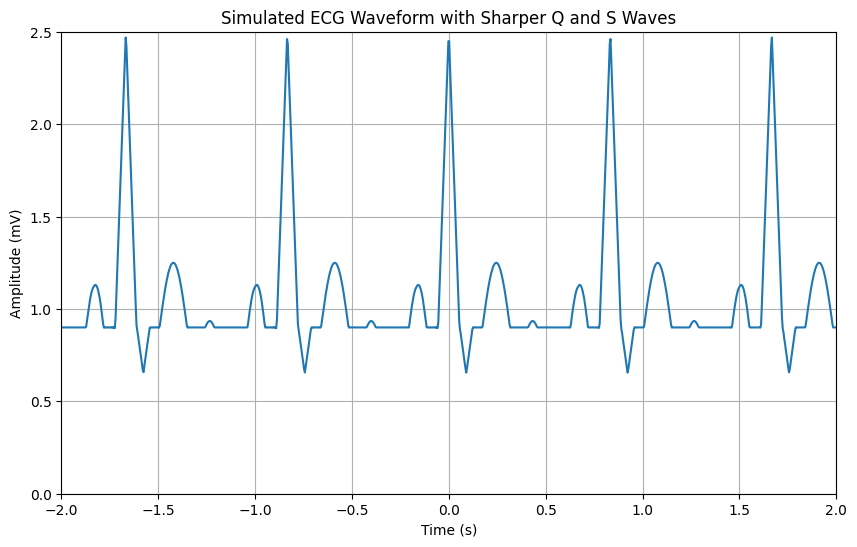

In [11]:
import numpy as np
import matplotlib.pyplot as plt


params = {
    'p': {'a': 0.25,    'd': 0.09,  't': 0.16},
    'q': {'a': 0.025,   'd': 0.066, 't': 0.166},          #DO NOT CHANGE THE AMPLITUDED OF Q WAVE
    'r': {'a': 1.6,     'd': 0.11,   't': 0.4},
    's': {'a': 0.25,   'd': 0.066, 't': 0.09},
    't': {'a': .35,     'd': 0.142, 't': 0.2},         #DO NOT CHANGE THE AMPLITUDE OF T WAVE
    'u': {'a': 0.035,   'd': 0.0476, 't': 0.433}
}

li = 30/72  # Length of the interval (1 second)
time = np.linspace(-2, 2, 1000)  

p_wave = p_wav(time, params['p']['a'], params['p']['d'], params['p']['t'], li)
q_wave = q_wav(time, params['q']['a'], params['q']['d'], params['q']['t'], li)
r_wave = qrs_wav(time, params['r']['a'], params['r']['d'], li)
s_wave = s_wav(time, params['s']['a'], params['s']['d'], params['s']['t'], li)
t_wave = t_wav(time, params['t']['a'], params['t']['d'], params['t']['t'], li)
u_wave = u_wav(time, params['u']['a'], params['u']['d'], params['u']['t'], li)


ecg_waveform = p_wave + q_wave + r_wave + s_wave + t_wave + u_wave

plt.figure(figsize=(10, 6))
plt.plot(time, ecg_waveform, label='ECG')
plt.title('Simulated ECG Waveform with Sharper Q and S Waves')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.xlim(-2,2)
plt.ylim(0,2.5)
plt.grid(True)
plt.show()
